In [3]:
# COVID‑19 Global Data Tracker

# *Date:* YYYY‑MM‑DD  
# *Author:* Mercylyne 



## 1. Imports & Settings


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# optional for maps:
import plotly.express as px
import geopandas as gpd

# global plot settings
plt.rcParams['figure.figsize'] = (12, 6)



In [4]:
# 2.1 Load OWID data
df = pd.read_csv('owid-covid-data.csv', parse_dates=['date'])

# 2.2 Peek at the data
df.head()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350085 entries, 0 to 350084
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    350085 non-null  object        
 1   continent                                   333420 non-null  object        
 2   location                                    350085 non-null  object        
 3   date                                        350085 non-null  datetime64[ns]
 4   total_cases                                 312088 non-null  float64       
 5   new_cases                                   340457 non-null  float64       
 6   new_cases_smoothed                          339198 non-null  float64       
 7   total_deaths                                290501 non-null  float64       
 8   new_deaths                                  340511 non-null  float64      

iso_code                                        0
continent                                   16665
location                                        0
date                                            0
total_cases                                 37997
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       337901
excess_mortality_cumulative                337901
excess_mortality                           337901
excess_mortality_cumulative_per_million    337901
Length: 67, dtype: int64

In [5]:
# 3. Data Cleaning
# 3.1 Filter to key countries
countries = ['Kenya', 'United States', 'India']
df_sel = df[df['location'].isin(countries)].copy()

# 3.2 Drop rows without dates or total_cases
df_sel.dropna(subset=['date', 'total_cases'], inplace=True)

# 3.3 Fill / interpolate missing values
df_sel[['new_cases', 'new_deaths']] = df_sel[['new_cases', 'new_deaths']].interpolate()


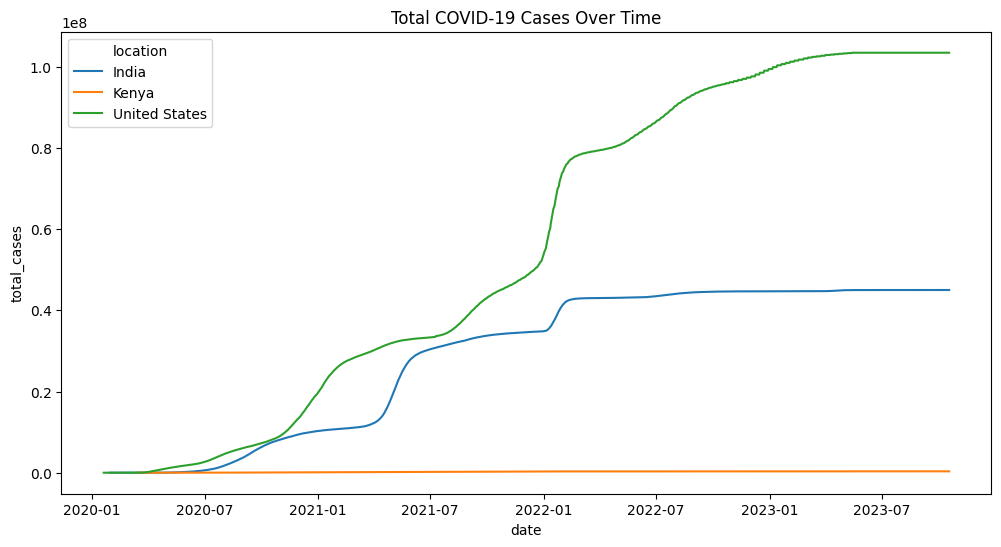

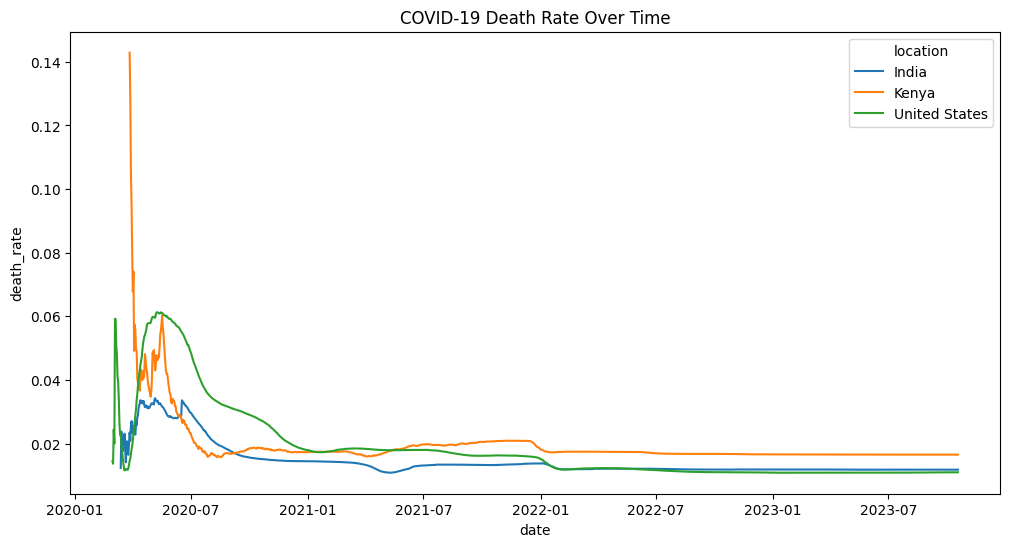

In [6]:
# 4. Exploratory Data Analysis (EDA)
# 4.1 Total cases over time
sns.lineplot(data=df_sel, x='date', y='total_cases', hue='location')
plt.title('Total COVID‑19 Cases Over Time')
plt.show()

# 4.2 Death rate
df_sel['death_rate'] = df_sel['total_deaths'] / df_sel['total_cases']
sns.lineplot(data=df_sel, x='date', y='death_rate', hue='location')
plt.title('COVID‑19 Death Rate Over Time')
plt.show()


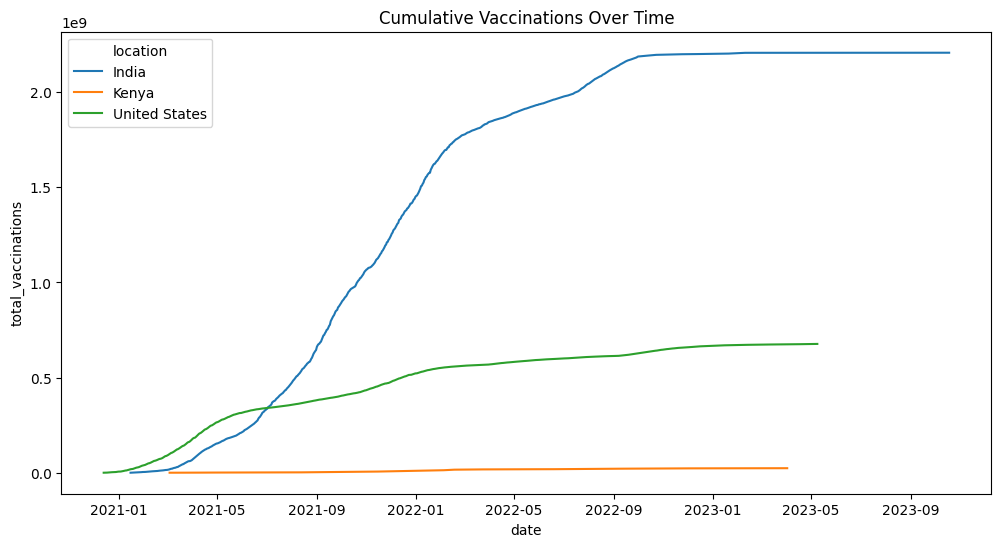

In [7]:
#5. Vaccination Progress
sns.lineplot(data=df_sel, x='date', y='total_vaccinations', hue='location')
plt.title('Cumulative Vaccinations Over Time')
plt.show()


In [ ]:
# 6. Chloropleth Map
import pandas as pd
import plotly.express as px

# 1. Get the latest total_cases per country
latest = (
    df
    .loc[df['date'] == df['date'].max(), ['iso_code', 'total_cases']]
    .dropna(subset=['iso_code'])
)

# 2. Build the choropleth with Plotly Express
fig = px.choropleth(
    latest,
    locations='iso_code',       # ISO-3 country codes
    color='total_cases',        # data to color by
    hover_name='iso_code',      # show ISO code on hover
    color_continuous_scale='Viridis',
    projection='natural earth',
    title=f"Global COVID-19 Cases as of {df['date'].max().date()}",
)

# 3. Display
fig.show()

